In [1]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt

In [2]:
train = pl.read_csv("data/train.csv")
test = pl.read_csv("data/test.csv")
sample_submission = pl.read_csv("data/sample_submission.csv")

In [3]:
# 文字列のカラムのユニーク数を確認 ⇒trainになくtestにあるカテゴリ値は存在しない
train_test = pl.concat([train.drop("health"), test])

pl.concat([eval(phase).select(pl.col(pl.Utf8)).approx_n_unique().with_columns(pl.lit(phase).alias("phase")) 
           for phase in ["train", "test", "train_test"]])

created_at,curb_loc,steward,guards,sidewalk,user_type,problems,spc_common,spc_latin,nta,nta_name,boroname,zip_city,phase
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,str
447,2,4,4,2,3,74,119,120,188,187,5,45,"""train"""
447,2,4,4,2,3,74,117,118,185,184,5,45,"""test"""
447,2,4,4,2,3,74,119,120,188,187,5,45,"""train_test"""


In [18]:
# 木の種類の一般的な名前(spc_common)と木のラテン名(spc_latin)は、1つの例外を除いて1対1対応する
print((train_test["spc_common"] + train_test["spc_latin"]).n_unique())
train_test[["spc_common", "spc_latin"]].approx_n_unique()

120


spc_common,spc_latin
u32,u32
119,120


In [20]:
# 地域の略称(nta)と地域の正式な名称(nta_name)は、1つの例外を除いて1対1対応する
print((train_test["nta"] + train_test["nta_name"]).n_unique())
train_test[["nta", "nta_name"]].approx_n_unique()

187


nta,nta_name
u32,u32
188,187


In [21]:
# boroname, borocodeは、1対1対応する
print((train_test["boroname"] + train_test["borocode"]).n_unique())
train_test[["boroname", "borocode"]].approx_n_unique()

5


boroname,borocode
u32,u32
5,5


created_at


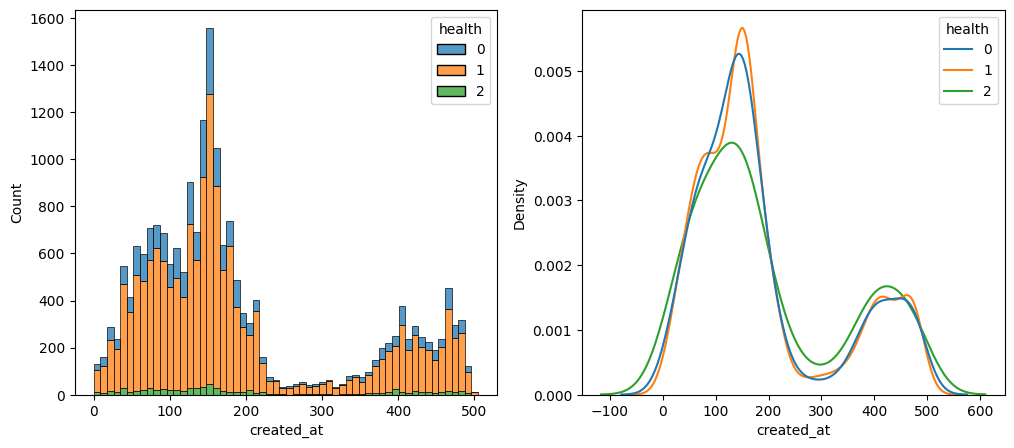

tree_dbh


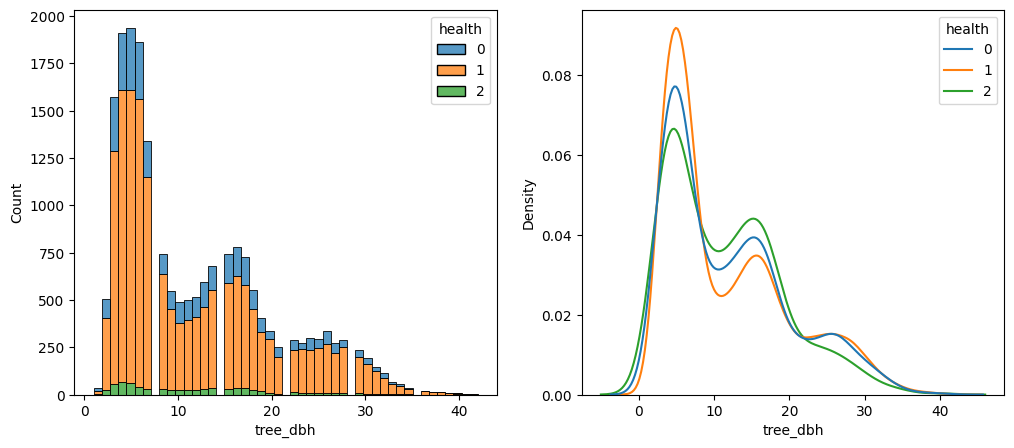

curb_loc


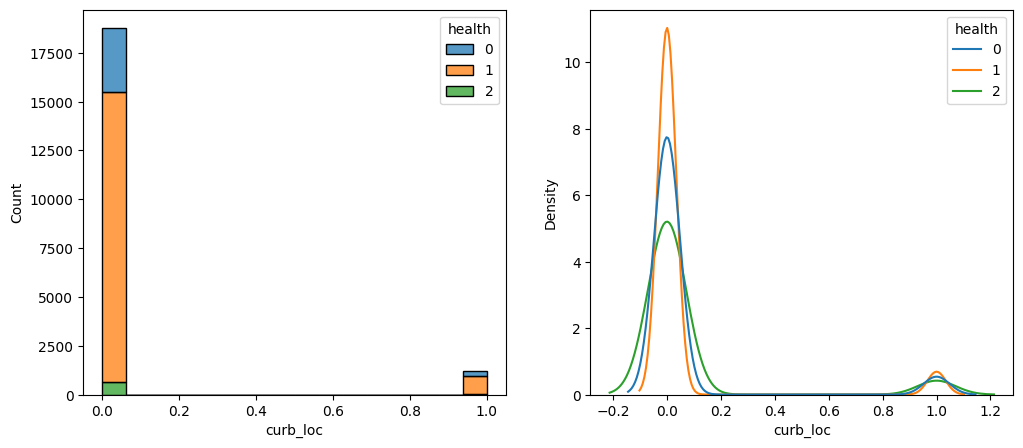

steward


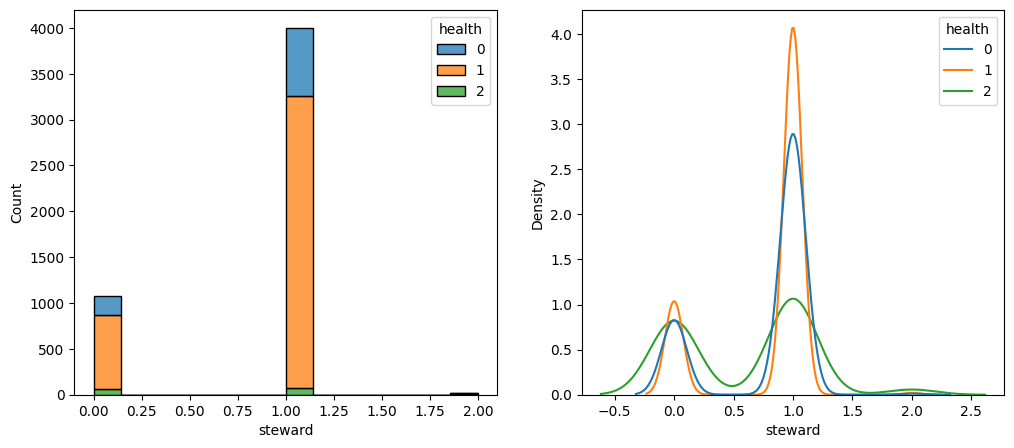

guards


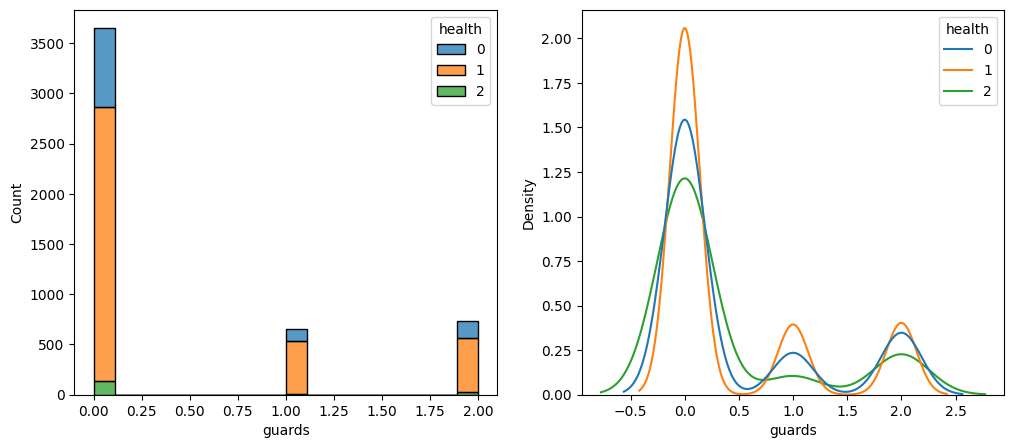

sidewalk


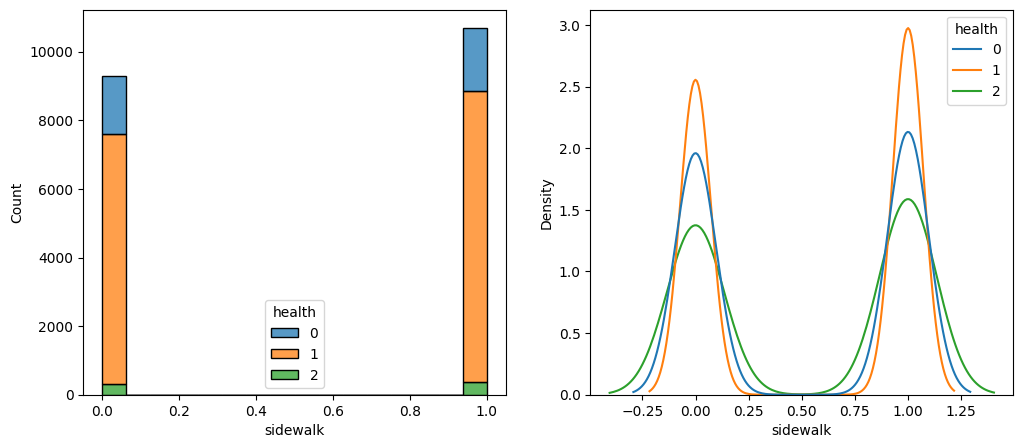

user_type


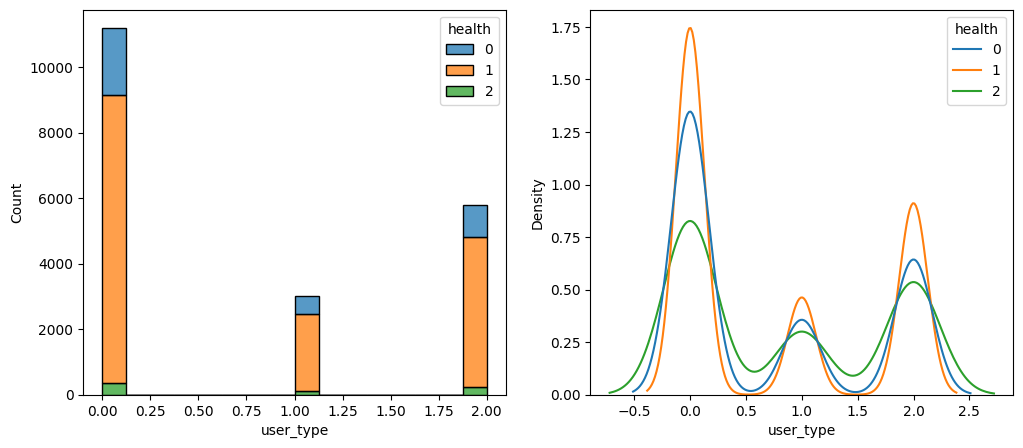

problems


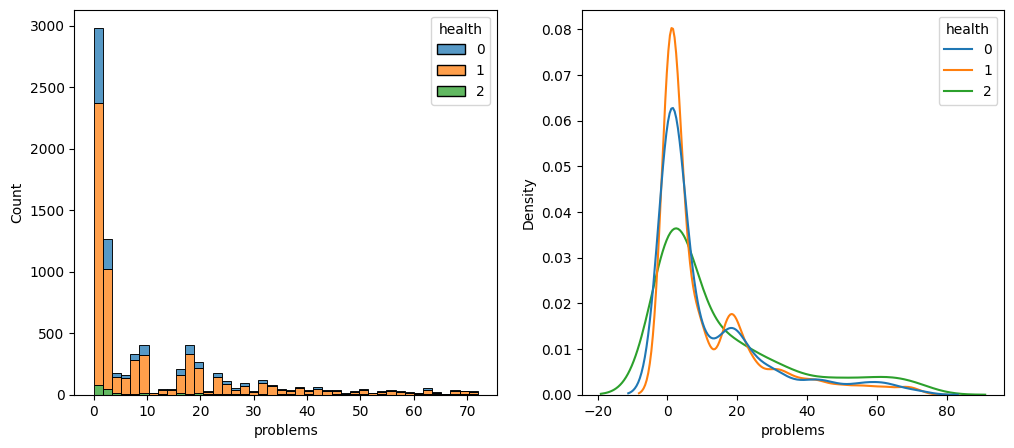

spc_common


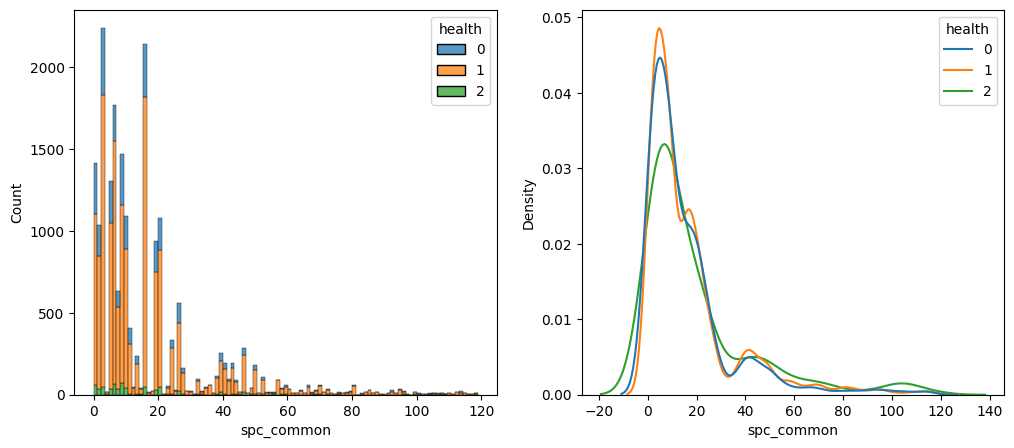

spc_latin


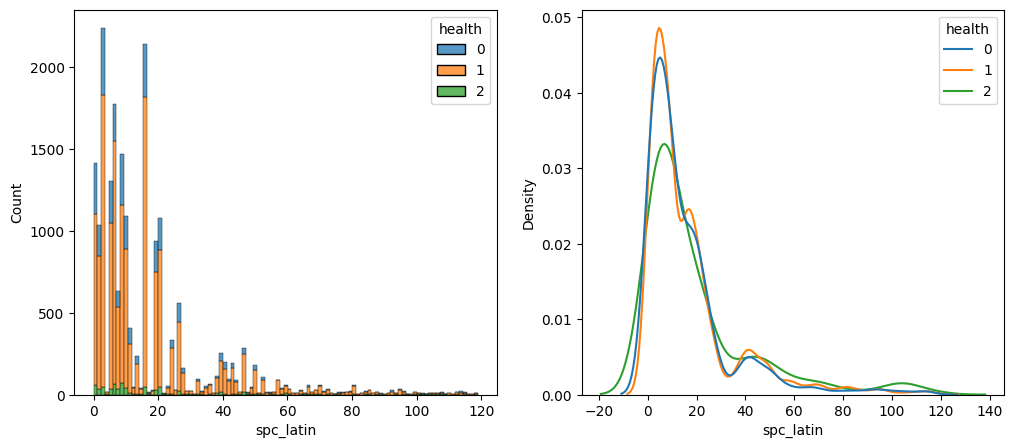

nta


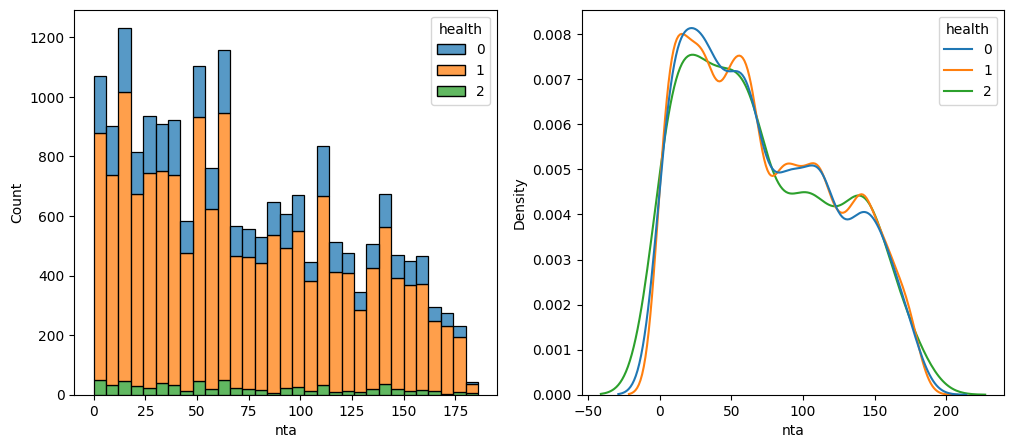

nta_name


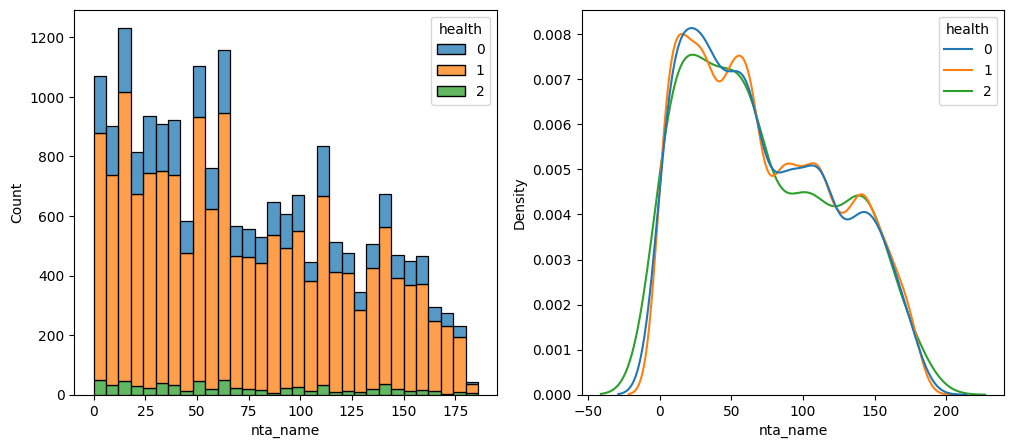

borocode


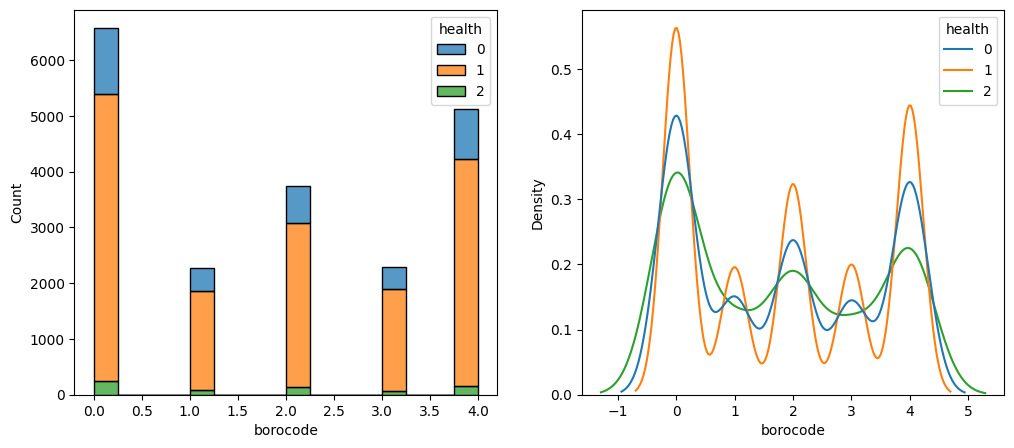

boro_ct


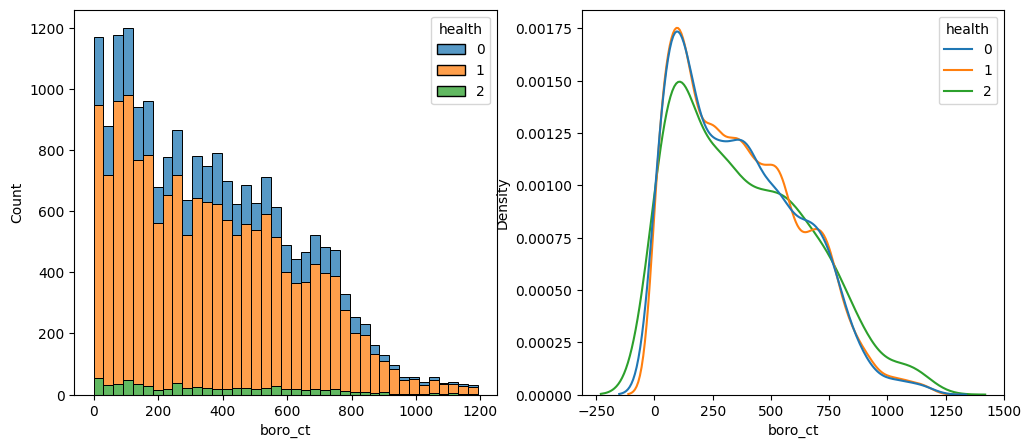

boroname


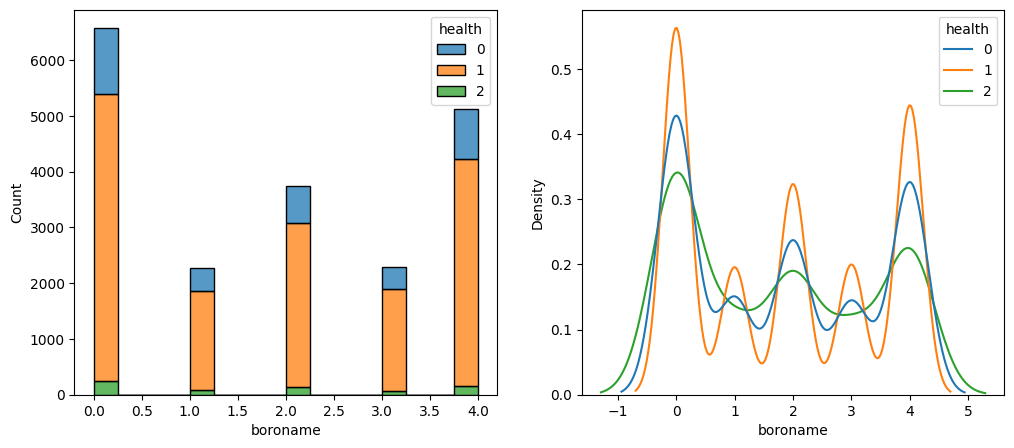

zip_city


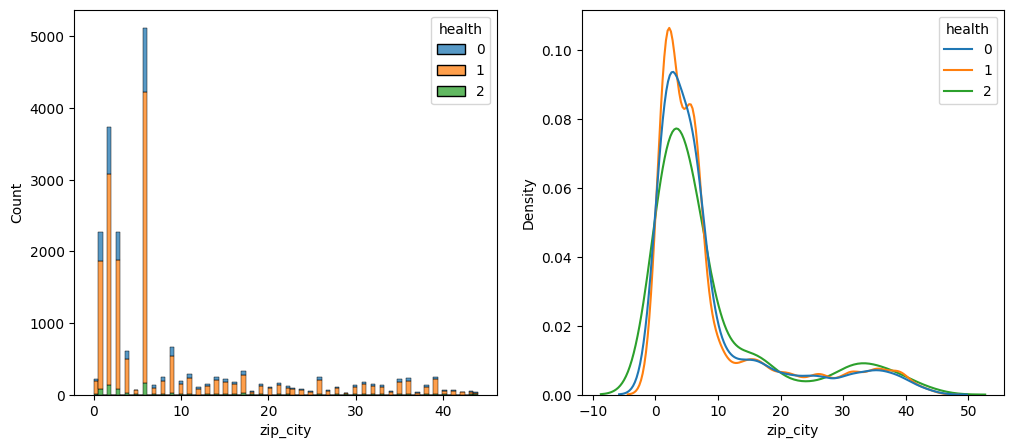

cb_num


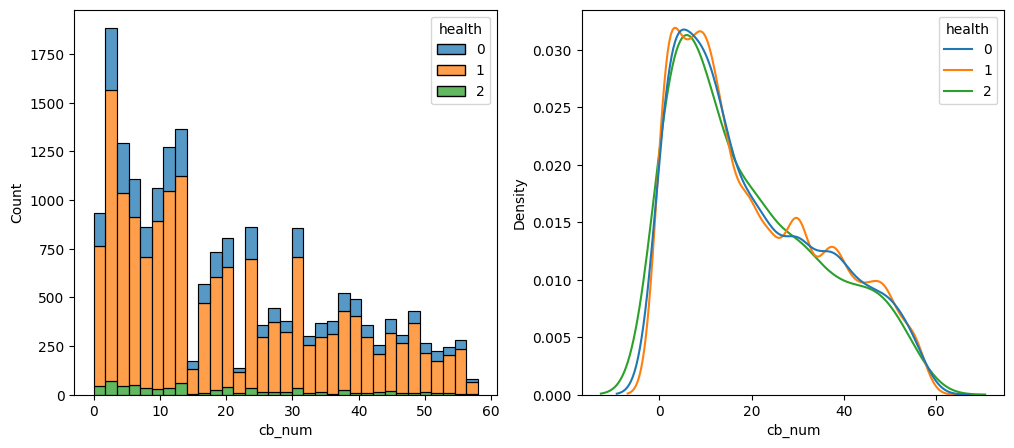

st_senate


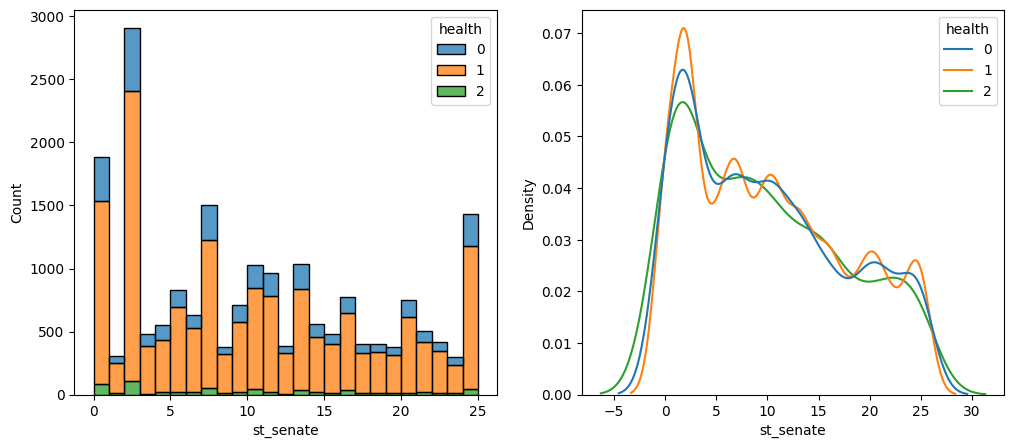

st_assem


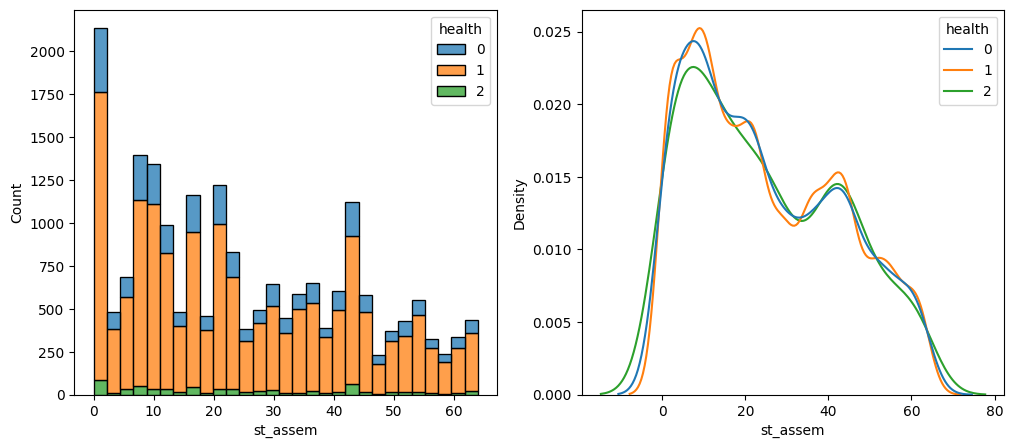

cncldist


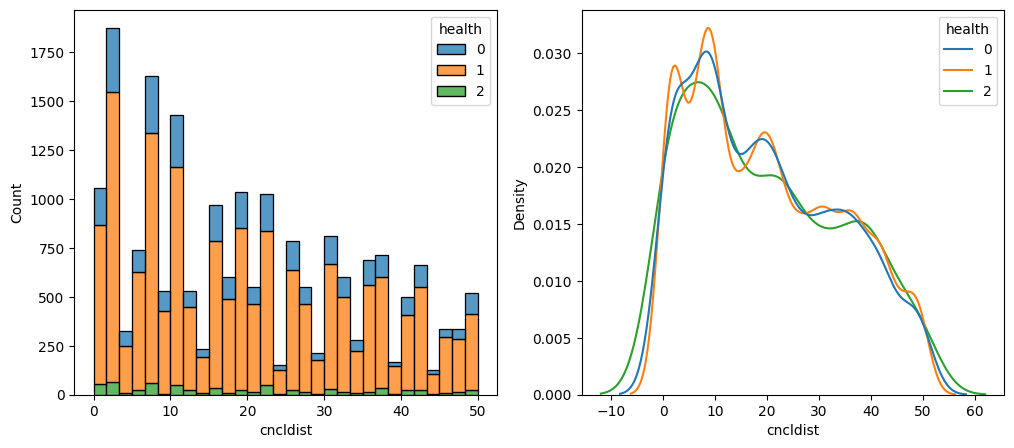

In [9]:
from visualize_distribution import visualize_distribution

train_feat = pl.read_csv("feat/feat_train_feat00.csv")
test_feat = pl.read_csv("feat/feat_test_feat00.csv")

# 説明変数のカラム
cols_exp = [c for c in test_feat.columns if c != "idx"]

hue = "health"
for x in cols_exp:
    print(x)
    visualize_distribution(train_feat, x, hue)
